#### Transformation With Functions

Some machine learning models like linear and logistic regression assume that the variables are normally distributed.  

Thus, Gaussian distributed variables may boost the machine learning algorithm performance.


#### How can we transform variables so that they follow a Gaussian distribution

There are a few straightforward methods to transform variables so that they follow a Gaussian distribution. None of them is better than the other, they rather depend on the original distribution of the variables. They are:

1) logarithmic transformation

2) reciprocal transformation

3) square root transformation

4) exponential transformation (more general, you can use any exponent)

5) boxcox transformation

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pylab 
import scipy.stats as stats ## this will help to transform the variable


In [3]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('/Users/nandrajog/Downloads/titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
# first I will fill the missing data of the variable age, with a random sample of the variable

def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
#     df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = np.random.choice(df[variable].dropna())
    print(random_sample)
    
    df[variable +'_random'] = df[variable].fillna(random_sample)
    
    # pandas needs to have the same index in order to merge datasets
#     random_sample.index = df[df[variable].isnull()].index
#     df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [8]:
# fill na
data['Age'] = impute_na(data, 'Age')

11.0


In [12]:
data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,11.0,23.4500
889,1,26.0,30.0000


#### To visualise the distribution of the variable, Age in this case, we plot a histogram to visualise a bell-shape, and the Q-Qplot. Remember that if the variable is normally distributed, we should see a 45 degree straight line of the values over the theoretical quantiles

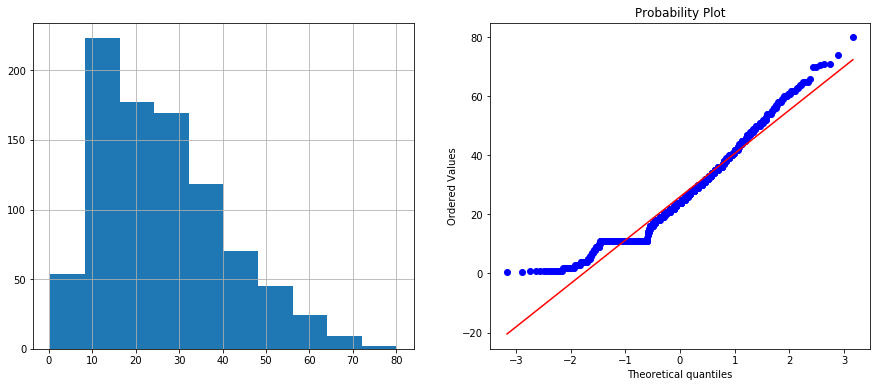

In [15]:
def dignostic_plot(df,col):
    
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[col].hist()
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[col],dist= 'norm',plot =pylab)
    plt.show()
dignostic_plot(data, 'Age')

The variable Age is almost normally distributed, except for some observations on the lower value tail of the distribution.

I will apply the above mentioned transformations and compare the distributions of the transformed Age.

#### Logarithmic transformation

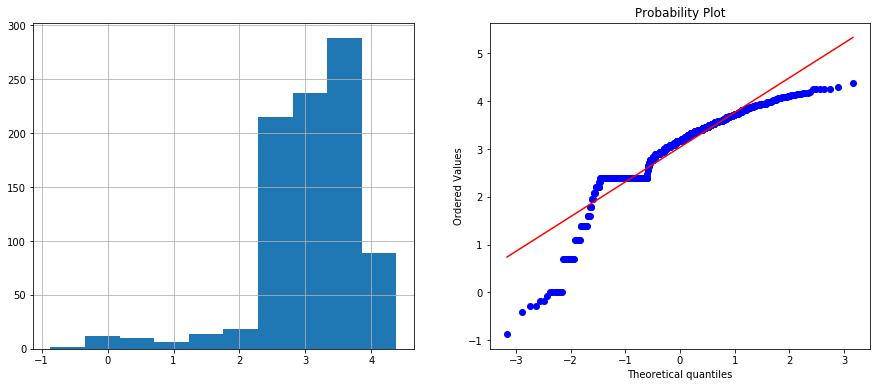

In [17]:
data['Age_log'] = np.log(data.Age)

dignostic_plot(data, 'Age_log')

The logarithmic transformation, did not render a Gaussian like distribution for Age.

#### Reciprocal transformation

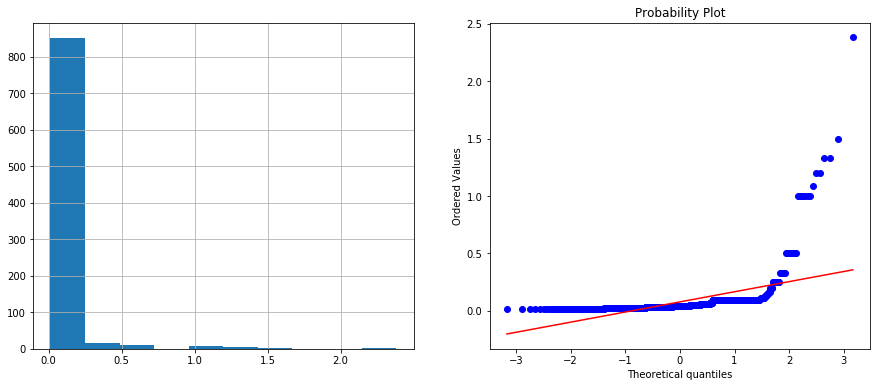

In [19]:
data['Age_reciprocal'] = 1/data.Age

dignostic_plot(data,'Age_reciprocal')

The reciprocal transformation was also not useful to transform Age into a variable normally distributed.

#### Square root transformation

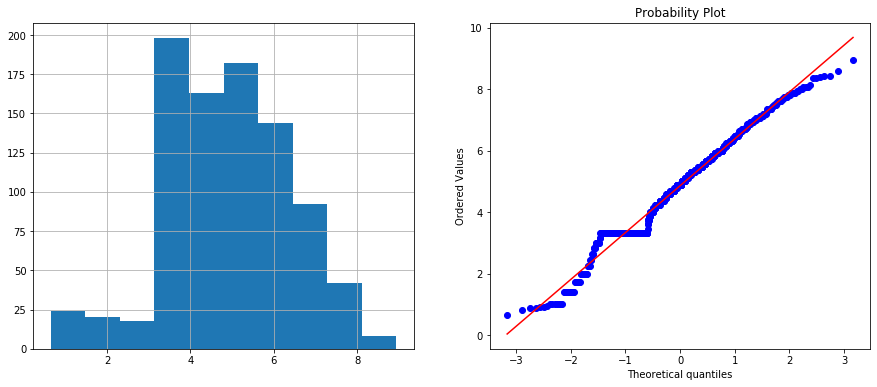

In [21]:
data['Age_sqr'] = np.sqrt(data.Age)
dignostic_plot(data,'Age_sqr')

The square root transformation is a bit more succesful that the previous2 transformations, however, the variable is still not Gaussian, and this does not represent an improvement towards normality respect the original distribution of Age.

#### Exponential

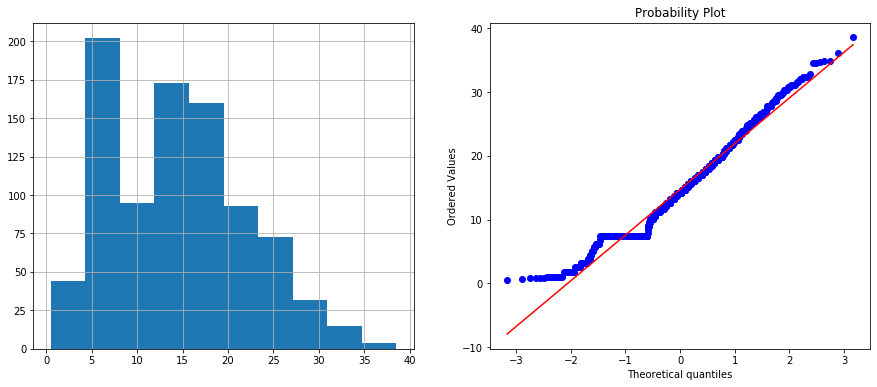

In [24]:
data['Age_exp'] = data.Age**(1/1.2)
dignostic_plot(data,'Age_exp')

The exponential transformation is the best of all the transformations above, at the time of generating a variable that is normally distributed.

#### Should I transform the variable? 


It depends on what we are trying to achieve. 

1) If this was a situation in a business setting, I would use the original variable without transformation to train the model

2) If on the other hand this was an exercise to win a data science competition, I would opt to use the variable that gives me the highest performance.

#### BoxCox transformation

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ


QQ plot calculate the correlation b/w Observed values and theoretical quntites, more the correlation more the Gaussian distribution 

Optimal λ:  0.5316594488676314


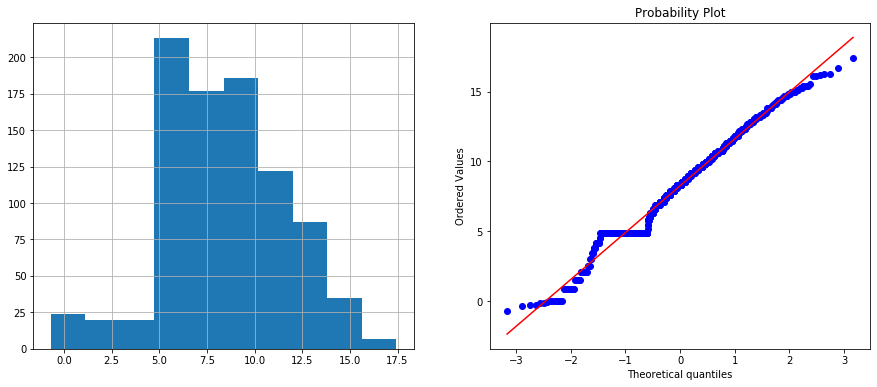

In [26]:
data['Age_boxcox'], param = stats.boxcox(data.Age) 

print('Optimal λ: ', param)

dignostic_plot(data, 'Age_boxcox')